In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt=pd.read_csv('D:/pyLX/NYstockprices.csv', index_col='date',parse_dates=True)

In [430]:
#dt.symbol.unique()

In [431]:
dt1=dt[dt.symbol=='AIV']
#dt1.head()
dt1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,30.436407,30.457446,30.130329,30.747747,1.468346e+06
std,7.390149,7.396364,7.360460,7.421176,8.117662e+05
min,15.380000,15.210000,15.010000,15.560000,2.748000e+05
25%,25.272500,25.232500,24.892499,25.490000,9.670250e+05
50%,28.300000,28.335000,28.035001,28.639999,1.283500e+06
75%,37.305001,37.369999,36.957499,37.747501,1.751200e+06
max,47.820000,47.590000,47.080002,47.910000,1.287420e+07


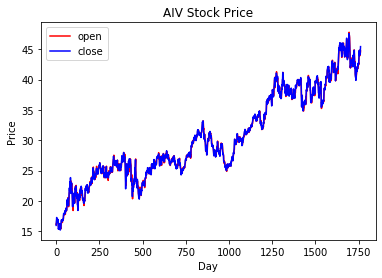

In [432]:
plt.plot(dt1.open.values,color='red',label='open')
plt.plot(dt1.close.values,color='blue',label='close')
plt.title('AIV Stock Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(loc='best')

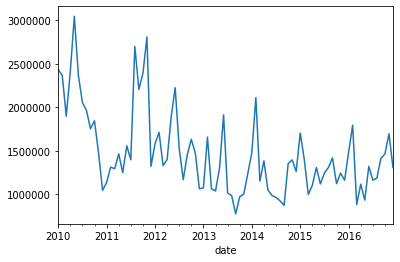

In [433]:
DtoM=dt1.volume
adj_V=DtoM.resample('M').mean()
adj_V.plot()

In [434]:
dt1.high.diff()

date
2010-01-04         NaN
2010-01-05    0.020001
2010-01-06    0.519998
2010-01-07    0.470002
2010-01-08   -0.150002
                ...   
2016-12-23    0.349999
2016-12-27    0.029999
2016-12-28   -0.489998
2016-12-29    0.389999
2016-12-30    0.750000
Name: high, Length: 1762, dtype: float64

In [435]:
df=pd.read_csv('D:/pyLX/NYstockprices.csv')
# ma5: average of previous 5 closing price
# ma3: average of previous 30 closing price
df['ma5']=df['open'].rolling(5).mean()      # calculate the mean of the previous 5 closing price and put into ma5
df['ma30']=df['open'].rolling(30).mean()
df.head(10)

,date,symbol,open,close,low,high,volume,ma5,ma30
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,NaN
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN,NaN
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN,NaN
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN,NaN
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,119.508000,NaN
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,117.924000,NaN
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,116.168001,NaN
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,115.594002,NaN
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,115.164001,NaN
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,114.494002,NaN


In [436]:
df1=df[(df['date']>'2016-01-21')&(df['date']<'2016-12-14')]
df2=df1[df.symbol=='AIV']
# Death Cross: ma5 < ma30
sr1=df2['ma5']>df2['ma30']
sr2=df2['ma5']<=df2['ma30']
df2[(sr1&sr2.shift(1))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,symbol,open,close,low,high,volume,ma5,ma30
755828,2016-03-31 00:00:00,AIV,41.669998,41.820000,41.470001,41.950001,1269300.0,59.738000,59.716667
756826,2016-04-04 00:00:00,AIV,42.020000,42.130001,41.840000,42.189999,1057500.0,60.300001,60.219667


In [437]:
death_cross=df2[(sr1&sr2.shift(1))].index

In [438]:
# Golden Cross: ma5 > ma30
df2[-(sr1|sr2.shift(1))]

,date,symbol,open,close,low,high,volume,ma5,ma30
738363,2016-02-09 00:00:00,AIV,35.240002,35.450001,35.000000,35.820000,2116700.0,50.690001,51.022334
756327,2016-04-01 00:00:00,AIV,41.650002,42.029999,41.619999,42.139999,842100.0,59.372000,59.416666
830762,2016-11-01 00:00:00,AIV,43.990002,43.630001,43.299999,44.340000,1618900.0,58.544001,60.877333


In [439]:
golden_cross=df2[-(sr1|sr2.shift(1))].index

In [440]:
# Suppose you have $10000 on Jan-1, 2016 planning to invest on stocks
# Decision: buy stocks when the day is Golden Cross; sell stocks when the day is Death Cross
fund=10000
money=fund
hold=0
sr1=pd.Series(1,index=golden_cross)
sr2=pd.Series(0,index=death_cross)
label=sr1.append(sr2).sort_index()
label

738363    1
755828    0
756327    1
756826    0
830762    1
dtype: int64

In [441]:
for i in range(0,len(label)):
    p=df1['open'][label.index[i]]
    if label.iloc[i]==1:
        buy=(money//(100*p))
        hold+=buy*100
        money-=buy*100*p
    else:
        money+=hold*p
        hold=0
p = df1['open'][df1.index[-1]]
final = hold*p+money
print(final-fund)

3417.9981999999964
